In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/Financial Analytics data.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.head())

   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore
0      1  Reliance Inds.        583436.72           99810.00
1      2             TCS        563709.84           30904.00
2      3       HDFC Bank        482953.59           20581.27
3      4             ITC        320985.27            9772.02
4      5         H D F C        289497.37           16840.51


In [ ]:
print(df.isnull().sum())

S.No.                 0
Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    30
dtype: int64


In [ ]:
df = df.dropna()
print(df)

     S.No.             Name  Mar Cap - Crore  Sales Qtr - Crore
0        1   Reliance Inds.        583436.72           99810.00
1        2              TCS        563709.84           30904.00
2        3        HDFC Bank        482953.59           20581.27
3        4              ITC        320985.27            9772.02
4        5          H D F C        289497.37           16840.51
..     ...              ...              ...                ...
482    495      Prime Focus          3031.50             609.61
483    496  Lak. Vilas Bank          3029.57             790.17
484    497            NOCIL          3026.26             249.27
485    498    Orient Cement          3024.32             511.53
486    499  Natl.Fertilizer          3017.07            2840.75

[458 rows x 4 columns]


In [ ]:
# Converting 'Mar Cap - Crore' and 'Sales Qtr - Crore' columns to numeric
df['Mar Cap - Crore'] = pd.to_numeric(df['Mar Cap - Crore'], errors='coerce')
df['Sales Qtr - Crore'] = pd.to_numeric(df['Sales Qtr - Crore'], errors='coerce')


In [ ]:
print(df.describe())

            S.No.  Mar Cap - Crore  Sales Qtr - Crore
count  458.000000       458.000000         458.000000
mean   246.718341     28902.445917        3814.871485
std    146.173892     60619.542673        9999.219808
min      1.000000      3017.070000           0.000000
25%    117.250000      4937.182500         534.565000
50%    243.500000     10432.270000        1140.585000
75%    371.750000     24747.930000        2742.417500
max    499.000000    583436.720000      110666.930000


In [ ]:
df = df.drop('S.No.', axis=1)

In [ ]:
df['Name'] = df['Name'].str.strip().str.lower()

In [ ]:
cleaned_file_path = 'cleaned_data.csv'
df.to_csv(cleaned_file_path, index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 486
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               458 non-null    object 
 1   Mar Cap - Crore    458 non-null    float64
 2   Sales Qtr - Crore  458 non-null    float64
dtypes: float64(2), object(1)
memory usage: 14.3+ KB


In [ ]:
df.isnull().sum()

Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [ ]:
#to calculate Descriptive Statistics - like mean, median, mode, standard deviation, and skewness for market capitalization and quarterly sales
market_cap_col = 'Mar Cap - Crore'
quarterly_sales_col = 'Sales Qtr - Crore'

# Calculate basic statistics using describe() method
basic_stats_market_cap = df[market_cap_col].describe()
basic_stats_sales = df[quarterly_sales_col].describe()

# Calculate mode separately as describe() doesn't include mode
mode_market_cap = df[market_cap_col].mode().values
mode_sales = df[quarterly_sales_col].mode().values

# Calculate skewness separately using skew() method
skewness_market_cap = df[market_cap_col].skew()
skewness_sales = df[quarterly_sales_col].skew()

# Print the results
print(f"Basic Statistics for Market Capitalization:\n{basic_stats_market_cap}\n")
print(f"Mode for Market Capitalization: {mode_market_cap}\n")
print(f"Skewness for Market Capitalization: {skewness_market_cap}\n")

print(f"Basic Statistics for Quarterly Sales:\n{basic_stats_sales}\n")
print(f"Mode for Quarterly Sales: {mode_sales}\n")
print(f"Skewness for Quarterly Sales: {skewness_sales}\n")



Basic Statistics for Market Capitalization:
count       458.000000
mean      28902.445917
std       60619.542673
min        3017.070000
25%        4937.182500
50%       10432.270000
75%       24747.930000
max      583436.720000
Name: Mar Cap - Crore, dtype: float64

Mode for Market Capitalization: [  3017.07   3024.32   3026.26   3029.57   3031.5    3041.93   3079.06
   3115.98   3125.83   3139.94   3148.36   3164.73   3185.45   3187.51
   3188.62   3189.1    3192.67   3209.89   3274.9    3316.31   3329.58
   3331.08   3336.05   3374.38   3376.2    3377.57   3380.99   3460.91
   3470.6    3482.71   3510.93   3511.08   3526.8    3528.07   3531.77
   3531.9    3577.98   3582.     3619.04   3674.6    3677.34   3711.8
   3716.46   3722.6    3734.06   3748.73   3760.61   3761.86   3764.1
   3765.74   3769.26   3775.5    3777.26   3789.45   3804.58   3809.
   3824.69   3826.83   3846.15   3847.19   3901.07   3910.17   3927.26
   3974.83   3975.44   4009.63   4022.02   4030.35   4057.34   406

In [ ]:
# To perform Correlation Analysis:
correlation = df[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()

# Print the correlation matrix
print(correlation)

                   Mar Cap - Crore  Sales Qtr - Crore
Mar Cap - Crore           1.000000           0.624351
Sales Qtr - Crore         0.624351           1.000000


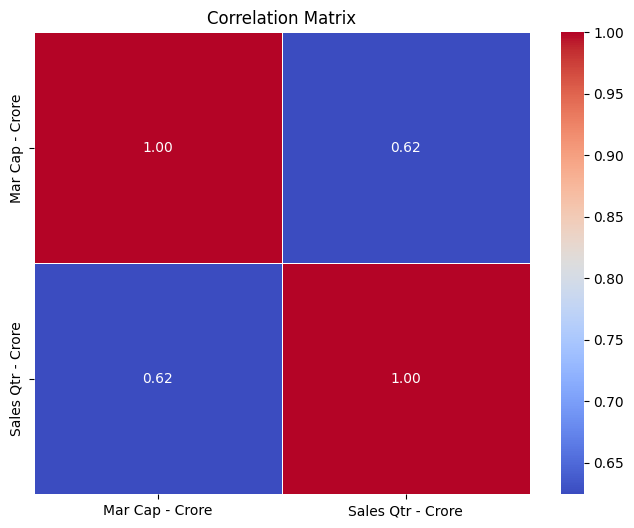

In [ ]:
# Plotting a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

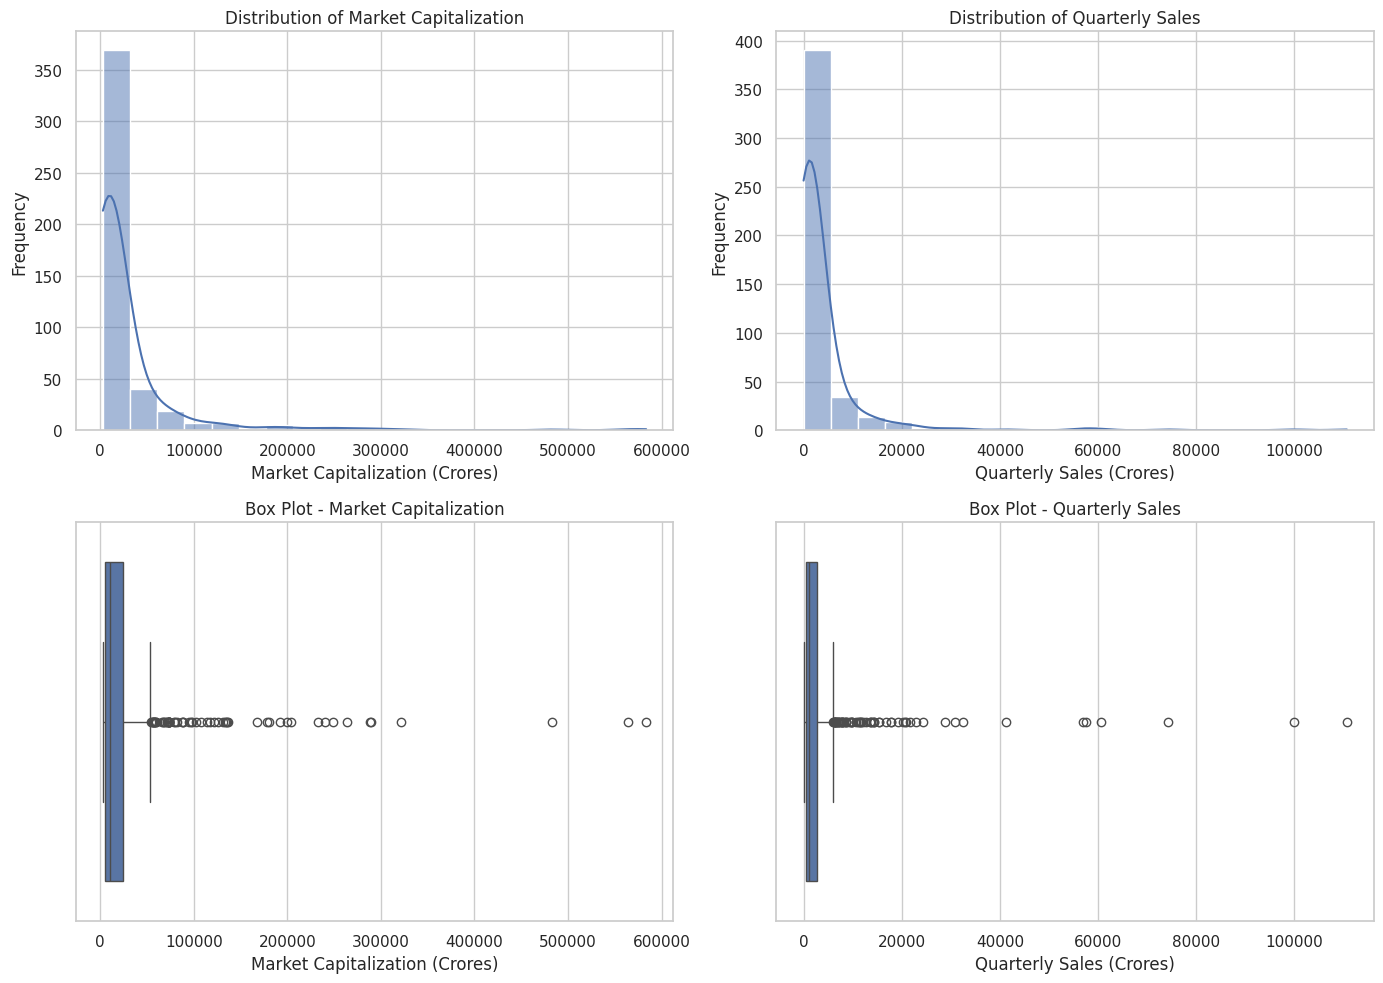

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot histograms for Market Capitalization and Quarterly Sales
sns.histplot(df['Mar Cap - Crore'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Market Capitalization')
axes[0, 0].set_xlabel('Market Capitalization (Crores)')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df['Sales Qtr - Crore'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Quarterly Sales')
axes[0, 1].set_xlabel('Quarterly Sales (Crores)')
axes[0, 1].set_ylabel('Frequency')

# Plot box plots for Market Capitalization and Quarterly Sales
sns.boxplot(x=df['Mar Cap - Crore'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot - Market Capitalization')
axes[1, 0].set_xlabel('Market Capitalization (Crores)')

sns.boxplot(x=df['Sales Qtr - Crore'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot - Quarterly Sales')
axes[1, 1].set_xlabel('Quarterly Sales (Crores)')

# Adjust layout
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

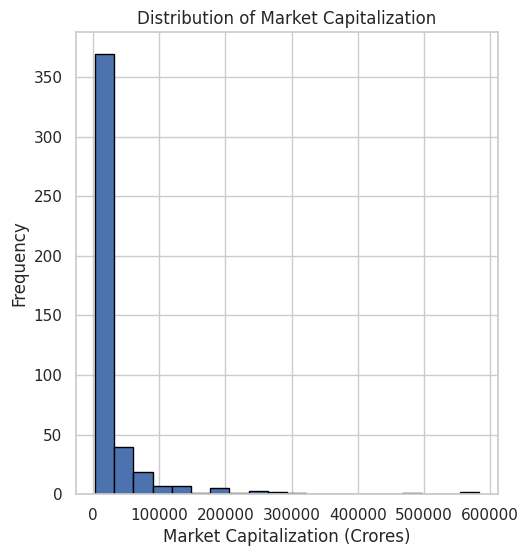

In [ ]:
# Explore distribution of market capitalization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Mar Cap - Crore'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Crores)')
plt.ylabel('Frequency')

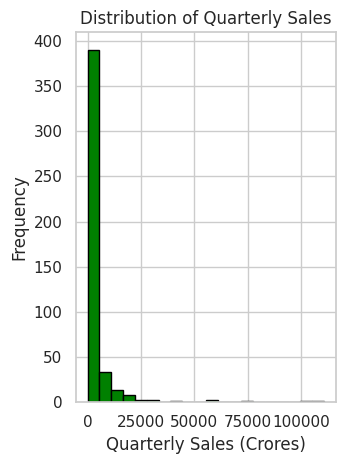

In [ ]:
# Explore distribution of quarterly sales
plt.subplot(1, 2, 2)
df['Sales Qtr - Crore'].plot(kind='hist', bins=20, edgecolor='black', color='green')
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Quarterly Sales (Crores)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



In [ ]:
# To Identify top and bottom performers based on market capitalization
top_performers = df.nlargest(10, 'Mar Cap - Crore')
bottom_performers = df.nsmallest(10, 'Mar Cap - Crore')

print("Top Performers (Market Capitalization):")
print(top_performers[['Name', 'Mar Cap - Crore']])

print("\nBottom Performers (Market Capitalization):")
print(bottom_performers[['Name', 'Mar Cap - Crore']])

Top Performers (Market Capitalization):
             Name  Mar Cap - Crore
0  reliance inds.        583436.72
1             tcs        563709.84
2       hdfc bank        482953.59
3             itc        320985.27
4         h d f c        289497.37
5  hind. unilever        288265.26
6   maruti suzuki        263493.81
7         infosys        248320.35
8         o n g c        239981.50
9  st bk of india        232763.33

Bottom Performers (Market Capitalization):
                Name  Mar Cap - Crore
486  natl.fertilizer          3017.07
485    orient cement          3024.32
484            nocil          3026.26
483  lak. vilas bank          3029.57
482      prime focus          3031.50
481    va tech wabag          3041.93
480     deepak fert.          3079.06
479  star ferro cem.          3115.98
478  kaveri seed co.          3125.83
477  firstsour.solu.          3139.94


Mean Absolute Error: 21303.81047919917
Mean Squared Error: 1614033249.8388658
Root Mean Squared Error: 40175.03266755194


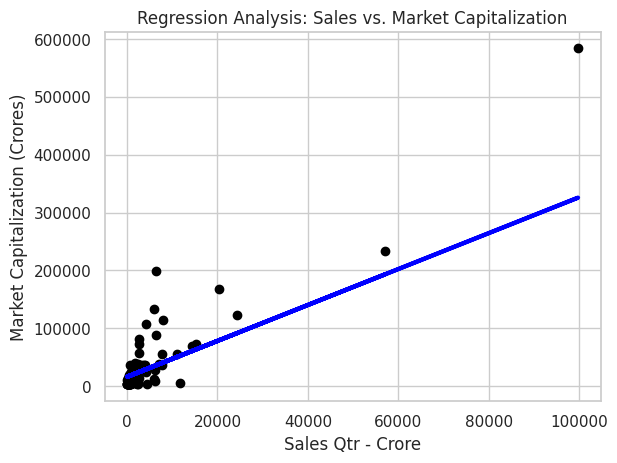

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Extract features (X) and target variable (y)
X = df[['Sales Qtr - Crore']]
y = df['Mar Cap - Crore']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# Visualize the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Regression Analysis: Sales vs. Market Capitalization')
plt.xlabel('Sales Qtr - Crore')
plt.ylabel('Market Capitalization (Crores)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


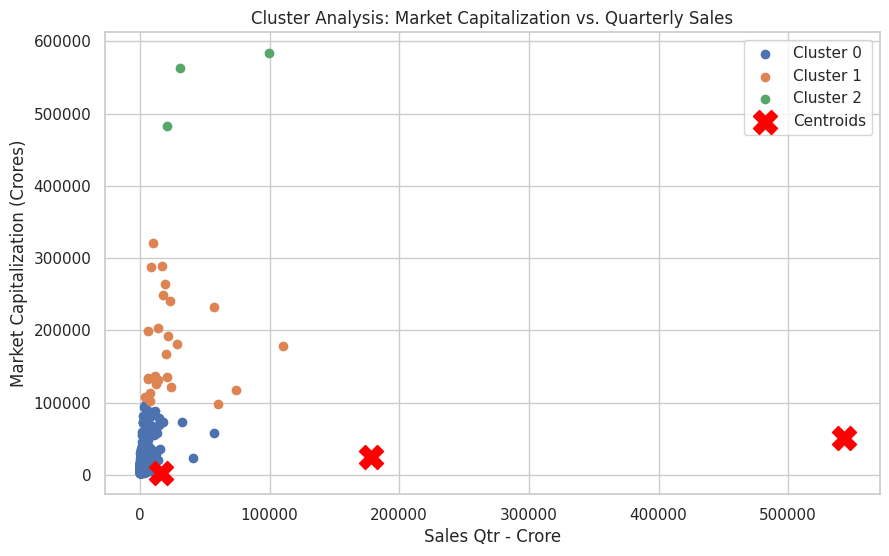

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Extract features (X)
X = df[['Mar Cap - Crore', 'Sales Qtr - Crore']]

# Choose the number of clusters (you may need to experiment to find the optimal number)
num_clusters = 3

# Create a KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Add a new column to your dataframe with the assigned cluster for each company
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Sales Qtr - Crore'], cluster_data['Mar Cap - Crore'], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Cluster Analysis: Market Capitalization vs. Quarterly Sales')
plt.xlabel('Sales Qtr - Crore')
plt.ylabel('Market Capitalization (Crores)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Calculate percentage changes in market capitalization and quarterly sales
df['Mar Cap Change %'] = df['Mar Cap - Crore'].pct_change() * 100
df['Sales Change %'] = df['Sales Qtr - Crore'].pct_change() * 100

# Calculate standard deviation as a measure of risk
marcap_std = df['Mar Cap Change %'].std()
sales_std = df['Sales Change %'].std()

# Calculate average returns
average_marcap_return = df['Mar Cap Change %'].mean()
average_sales_return = df['Sales Change %'].mean()

# Print the results
print(f"Market Cap Standard Deviation: {marcap_std:.2f}%")
print(f"Quarterly Sales Standard Deviation: {sales_std:.2f}%")
print(f"Average Market Cap Return: {average_marcap_return:.2f}%")
print(f"Average Quarterly Sales Return: {average_sales_return:.2f}%")


Market Cap Standard Deviation: 2.32%
Quarterly Sales Standard Deviation: nan%
Average Market Cap Return: -1.11%
Average Quarterly Sales Return: inf%


Mean Squared Error: 2764248328.691139


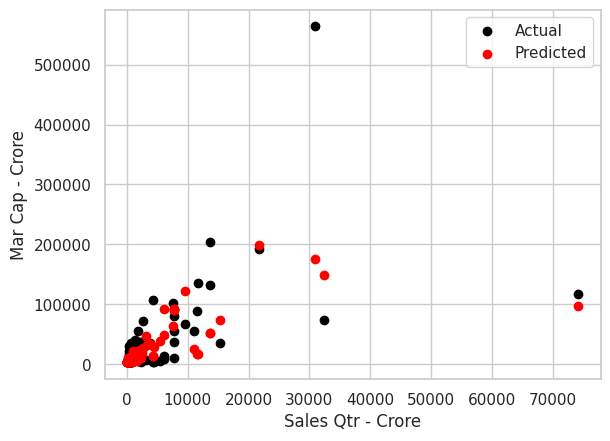

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values, if any
df.dropna(inplace=True)

# Select features (independent variables) and target (dependent variable)
features = df[['Sales Qtr - Crore']]
target = df['Mar Cap - Crore']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Visualize the results (optional)
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.xlabel('Sales Qtr - Crore')
plt.ylabel('Mar Cap - Crore')
plt.legend()
plt.show()


In [ ]:
!pip install tensorflow
!pip install pandas
!pip install scikit-learn


Epoch 1/20
10/10 - 2s - loss: 2924268800.0000 - val_loss: 4646053376.0000 - 2s/epoch - 226ms/step
Epoch 2/20
10/10 - 0s - loss: 2924256256.0000 - val_loss: 4646022144.0000 - 185ms/epoch - 19ms/step
Epoch 3/20
10/10 - 0s - loss: 2924238592.0000 - val_loss: 4645984256.0000 - 138ms/epoch - 14ms/step
Epoch 4/20
10/10 - 0s - loss: 2924219136.0000 - val_loss: 4645936640.0000 - 102ms/epoch - 10ms/step
Epoch 5/20
10/10 - 0s - loss: 2924193024.0000 - val_loss: 4645880320.0000 - 112ms/epoch - 11ms/step
Epoch 6/20
10/10 - 0s - loss: 2924160256.0000 - val_loss: 4645810176.0000 - 92ms/epoch - 9ms/step
Epoch 7/20
10/10 - 0s - loss: 2924116992.0000 - val_loss: 4645724160.0000 - 169ms/epoch - 17ms/step
Epoch 8/20
10/10 - 0s - loss: 2924067840.0000 - val_loss: 4645634048.0000 - 79ms/epoch - 8ms/step
Epoch 9/20
10/10 - 0s - loss: 2924021760.0000 - val_loss: 4645538816.0000 - 78ms/epoch - 8ms/step
Epoch 10/20
10/10 - 0s - loss: 2923956992.0000 - val_loss: 4645425664.0000 - 89ms/epoch - 9ms/step
Epoch 11/

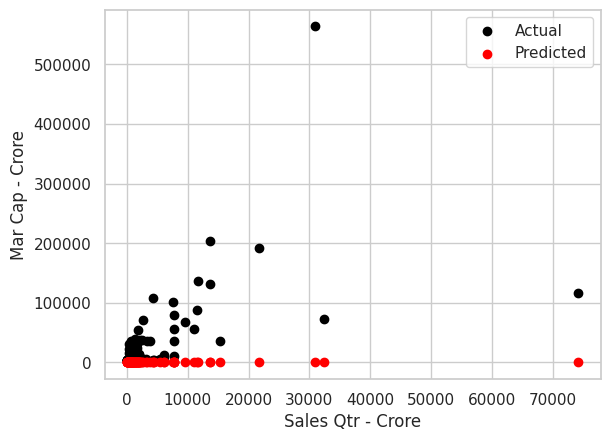

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Drop rows with missing values, if any
df.dropna(inplace=True)

# Select features (independent variables) and target (dependent variable)
features = df[['Sales Qtr - Crore']]
target = df['Mar Cap - Crore']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer, no activation function for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Mean Squared Error: {loss}")

# Make predictions
predictions = model.predict(X_test_scaled)

# Visualize the results (optional)
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.xlabel('Sales Qtr - Crore')
plt.ylabel('Mar Cap - Crore')
plt.legend()
plt.show()


In [ ]:
# Assuming df is your DataFrame
ratio = df['MarketCap_Sales_Ratio'] = df['Mar Cap - Crore'] / df['Sales Qtr - Crore']
ratio

1      18.240676
2      23.465685
3      32.847382
4      17.190535
5      33.558237
         ...    
482     4.972851
483     3.834074
484    12.140490
485     5.912302
486     1.062068
Length: 457, dtype: float64

In [ ]:
rank = df['MarketCap_Rank'] = df['Mar Cap - Crore'].rank(ascending=False)
rank
# Now, df['MarketCap_Rank'] contains the rank of each company based on market capitalization


1        1.0
2        2.0
3        3.0
4        4.0
5        5.0
       ...  
482    453.0
483    454.0
484    455.0
485    456.0
486    457.0
Name: Mar Cap - Crore, Length: 457, dtype: float64